In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'c:\\Users\\acer\\Desktop'

In [3]:
data=pd.read_csv(r"c:\Users\\acer\\Downloads\iris.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.drop(["Id"],axis=1,inplace=True)


In [7]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris_setosa=data[data[list(data.columns)[-1]]=="iris_setosa"]
iris_versicolor=data[data[list(data.columns)[-1]]=="iris_versicolor"]
iris_virginia=data[data[list(data.columns)[-1]]=="iris_virginia"]




In [9]:
#labeling
from sklearn.preprocessing import LabelEncoder

x=data[list(data.columns)[:-1]]
y=data[list(data.columns)[-1]]
y.value_counts()

encoder=LabelEncoder()
encodedy=encoder.fit_transform(y)
encodedy

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
scaledx=scaler.transform(x)
scaledx



array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [10]:
#modeling
from sklearn import model_selection

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(scaledx,encodedy,test_size=0.2,random_state=3)

In [11]:
from sklearn import naive_bayes

model1=naive_bayes.GaussianNB()
model1.fit(xtrain,ytrain)

ypred=model1.predict(xtest)
ypred,ytest

(array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
        2, 1, 0, 2, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
        2, 1, 0, 2, 2, 1, 1, 1]))

In [12]:
#oporer tar aro info
from sklearn import naive_bayes

model1=naive_bayes.GaussianNB()
model1.fit(xtrain,ytrain)

ypred=model1.predict(xtest)
(ypred==ytest).sum()/len(ytest)

0.9666666666666667

In [13]:
from sklearn.metrics import f1_score, confusion_matrix

print("Confusion Matrix:\n ",confusion_matrix(ypred,ytest))
print("F1_Score: ",f1_score(y_pred=ypred,y_true=ytest,average=None))

Confusion Matrix:
  [[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
F1_Score:  [1.         0.95238095 0.94736842]


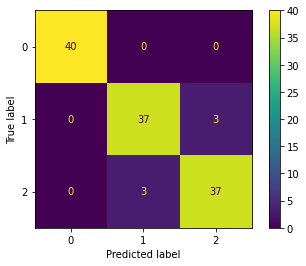

In [14]:
from sklearn import metrics

metrics.plot_confusion_matrix(model1,xtrain,ytrain)

In [15]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model1=naive_bayes.GaussianNB()
cv=cross_val_score(
    model1,scaledx,encodedy,cv=5,scoring="accuracy"
)
cv.mean()

0.9533333333333334

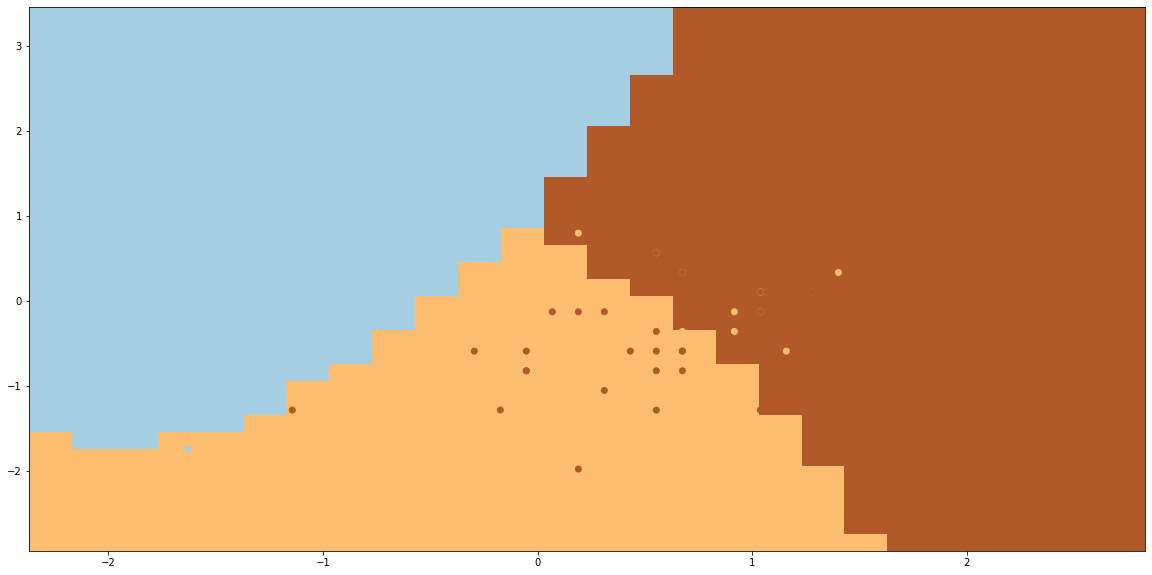

In [16]:
final_model1=naive_bayes.GaussianNB()
final_model1.fit(scaledx[:,:2],encodedy)

xmin,xmax = scaledx[:,:2][:,0].min() - 0.5,scaledx[:,:2][:,0].max() + 0.5
ymin,ymax = scaledx[:,:2][:,1].min() - 0.5,scaledx[:,:2][:,1].max() + 0.5

xx,yy=np.meshgrid(
    np.arange(xmin,xmax,0.2),np.arange(ymin,ymax,0.2)
)
z=final_model1.predict(np.c_[xx.ravel(),yy.ravel()])
z
#color
z=z.reshape(xx.shape)
plt.figure(1,figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)

#plot
plt.scatter(scaledx[:,:2][:,0],scaledx[:,:2][:,1],c=encodedy)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

